<a href="https://colab.research.google.com/github/mralamdari/Computer-Vision-Projects/blob/main/Autoencoders_for_Image_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

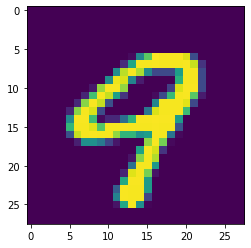

In [12]:
img = x_train[np.random.randint(len(x_train))]
plt.imshow(img)

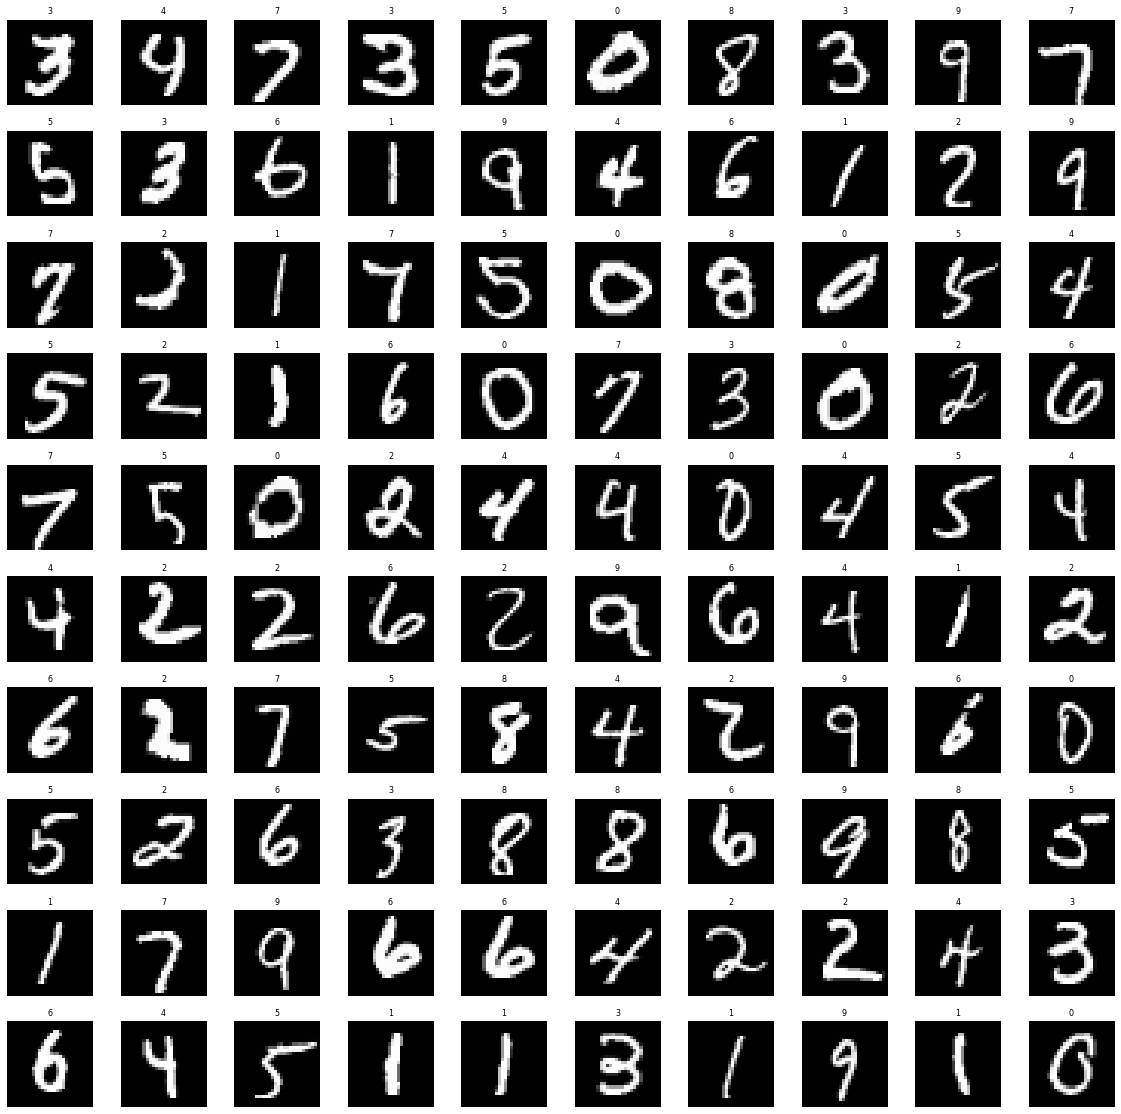

In [17]:
height = 10
width = 10
fig, axis = plt.subplots(height, width, figsize=(20, 20))
for h in range(height):
  for w in range(width):
    ind = np.random.randint(len(x_train))
    img = x_train[ind]
    axis[h][w].imshow(img, cmap='gray')
    axis[h][w].axis('off')
    axis[h][w].set_title(y_train[ind], fontsize=8)

plt.subplots_adjust(hspace=0.3)